In [2]:
import os
import pandas as pd


csv_directory = 'data'

dataframes = []

# Loop through the files in the directory
for filename in os.listdir(csv_directory):
    #print ('reading '+ filename)
    if filename.endswith('.csv'):
        # Read each CSV file into a DataFrame
        file_path = os.path.join(csv_directory, filename)
        print ('reading '+ file_path)
        df = pd.read_csv(file_path)
        
        # Append the DataFrame to the list
        dataframes.append(df)
        print ('done ... ')


reading data\SimData_2022.07.28_10.07.30.csv
done ... 
reading data\SimData_2022.07.28_10.11.13.csv
done ... 
reading data\SimData_2022.07.28_10.59.59.csv
done ... 
reading data\SimData_2022.07.28_11.47.45.csv
done ... 
reading data\SimData_2022.07.28_12.16.14.csv
done ... 
reading data\SimData_2022.07.28_13.45.28.csv
done ... 
reading data\SimData_2022.07.28_14.02.12.csv
done ... 
reading data\SimData_2022.07.28_14.19.29.csv
done ... 
reading data\SimData_2022.07.28_14.44.18.csv
done ... 


In [4]:
# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)
print ('done creation of combined df ')

done creation of combined df 


In [5]:
combined_df.shape[0]

495022

In [4]:
combined_df

,Elapsed Time,Date,System UTC Time,Latitude,Longitude,Altitude(MSL),Altitude(AGL),Heading(mag),Heading(true),Pitch,...,Fuel Low Warning,Generator 0 Failure Warning,Generator 1 Failure Warning,Hydraulic System Warning,Rotor Low RPM Warning,Rotor High RPM Warning,Tail Rotor Chip Warning,Transmission Chip Warning,Transmission Oil Temp Warning,Transmission Oil Pressure Warning
0,(s),(mm/dd/yyyy),(HH:MM:SS.ss),deg,deg,feet,feet,deg,deg,deg,...,boolean,failure_enum,failure_enum,boolean,boolean,boolean,failure_enum,bitfield,bitfield,bitfield
1,NaN,07/28/2022,14:07:52.429,Scenario Starts,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.017,07/28/2022,14:07:52.445,39.464851,-74.565964,57.58,0.06,218.647,206.346,0.041,...,0,0,0,0,0,0,0,0,0,0
3,0.038,07/28/2022,14:07:52.467,39.464851,-74.565964,57.58,0.06,218.622,206.322,0.038,...,0,0,0,0,0,0,0,0,0,0
4,0.056,07/28/2022,14:07:52.485,39.464851,-74.565964,57.58,0.06,218.607,206.307,0.036,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495017,1477.53,07/28/2022,19:09:19.798,33.336769,-118.311,16.35,0.14,186.819,198.51,10.068,...,0,0,0,0,0,0,0,0,0,0
495018,1477.55,07/28/2022,19:09:19.821,33.336769,-118.311,16.35,0.14,186.819,198.51,10.068,...,0,0,0,0,0,0,0,0,0,0
495019,1477.58,07/28/2022,19:09:19.847,33.336769,-118.311,16.35,0.14,186.819,198.51,10.068,...,0,0,0,0,0,0,0,0,0,0
495020,1477.6,07/28/2022,19:09:19.869,33.336769,-118.311,16.35,0.14,186.819,198.51,10.068,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df1 = combined_df

In [7]:
selected_df2 = df1[['Vert. Speed', 'Groundspeed', 'Altitude(AGL)','Date','System UTC Time']]
selected_df2

,Vert. Speed,Groundspeed,Altitude(AGL),Date,System UTC Time
0,feet/min,kts,feet,(mm/dd/yyyy),(HH:MM:SS.ss)
1,NaN,NaN,NaN,07/28/2022,14:07:52.429
2,-0.001,0.041,0.06,07/28/2022,14:07:52.445
3,0.004,0.038,0.06,07/28/2022,14:07:52.467
4,0.008,0.032,0.06,07/28/2022,14:07:52.485
...,...,...,...,...,...
495017,0.01,0,0.14,07/28/2022,19:09:19.798
495018,0.01,0,0.14,07/28/2022,19:09:19.821
495019,0.01,0,0.14,07/28/2022,19:09:19.847
495020,0.011,0,0.14,07/28/2022,19:09:19.869


In [40]:
datatypes = selected_df2.dtypes
print(datatypes)

Vert. Speed        object
Groundspeed        object
Altitude(AGL)      object
Date               object
System UTC Time    object
dtype: object


In [8]:
import pandas as pd

# Convert all columns to string to handle initial 'object' data type
selected_df2 = selected_df2.astype(str)

# Define a custom function to clean and convert values to float
def clean_and_convert(value):
    try:
        if value:  # Check if the string is not empty
            return float(value)
        else:
            return None
    except (ValueError, TypeError):
        return None  # Handle conversion errors by returning None

# Convert 'Vert. Speed', 'Groundspeed', and 'Altitude(AGL)' columns to float
selected_df2['Vert. Speed'] = selected_df2['Vert. Speed'].apply(clean_and_convert)
selected_df2['Groundspeed'] = selected_df2['Groundspeed'].apply(clean_and_convert)
selected_df2['Altitude(AGL)'] = selected_df2['Altitude(AGL)'].apply(clean_and_convert)

# Convert 'Date' to (mm/dd/yyyy) date type
selected_df2['Date'] = pd.to_datetime(selected_df2['Date'], format='%m/%d/%Y', errors='coerce')

# Convert 'System UTC Time' to (HH:MM:SS.ss) date type
selected_df2['System UTC Time'] = pd.to_datetime(selected_df2['System UTC Time'], format='%H:%M:%S.%f', errors='coerce')


In [9]:
datatypes = selected_df2.dtypes
print(datatypes)

Vert. Speed               float64
Groundspeed               float64
Altitude(AGL)             float64
Date               datetime64[ns]
System UTC Time    datetime64[ns]
dtype: object


In [10]:
selected_df2.count()

Vert. Speed        494989
Groundspeed        494989
Altitude(AGL)      494989
Date               495013
System UTC Time    495013
dtype: int64

In [11]:
#Check for missing values
import pandas as pd

# List of columns you want to check for missing values
columns_to_check = ['Vert. Speed', 'Groundspeed', 'Altitude(AGL)','Date','System UTC Time']

# Iterate through the selected columns and count missing values
missing_value_counts = {}
for column in columns_to_check:
    missing_count = selected_df2[column].isnull().sum()
    missing_value_counts[column] = missing_count

# Print the missing value counts
for column, count in missing_value_counts.items():
    print(f"Missing values in '{column}': {count}")

Missing values in 'Vert. Speed': 33
Missing values in 'Groundspeed': 33
Missing values in 'Altitude(AGL)': 33
Missing values in 'Date': 9
Missing values in 'System UTC Time': 9


In [12]:
duplicate_rows = selected_df2[selected_df2.duplicated()]
print("Number of duplicated rows:", len(duplicate_rows))

Number of duplicated rows: 8


In [13]:
original_df = selected_df2.copy()  # Creating a copy of the original DataFrame
selected_df2.dropna(subset=columns_to_check, inplace=True)

# Comparing the two DataFrames to see which rows were dropped
dropped_rows = len(original_df) - len(selected_df2)
print("Number of rows dropped:", dropped_rows)


Number of rows dropped: 33


In [14]:
#Count of rows after dropping missing values
selected_df2.count()

Vert. Speed        494989
Groundspeed        494989
Altitude(AGL)      494989
Date               494989
System UTC Time    494989
dtype: int64

In [15]:
selected_df2.describe()

,Vert. Speed,Groundspeed,Altitude(AGL)
count,494989.000000,494989.000000,494989.000000
mean,-21.959768,74.035150,1321.323966
std,547.950564,40.220744,922.553661
min,-2976.704000,0.000000,-0.770000
25%,-201.247000,50.697000,447.170000
50%,-0.013000,84.223000,1569.980000
75%,80.653000,104.134000,2051.970000
max,4729.745000,146.391000,2807.800000


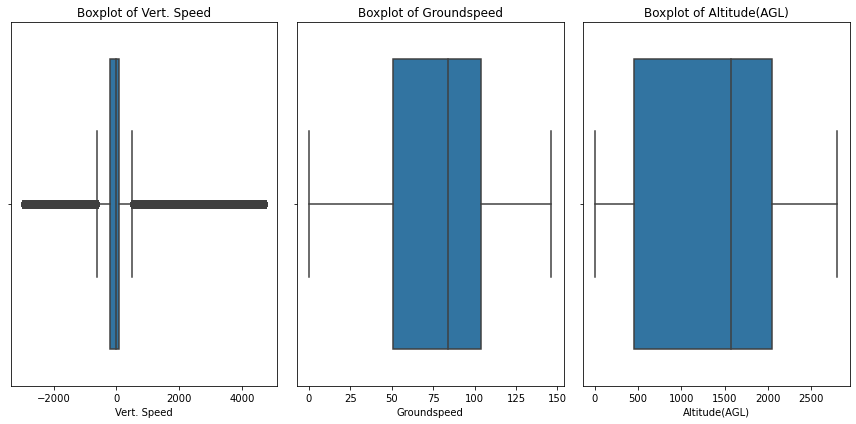

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for outliers in 'Vert. Speed', 'Groundspeed', and 'Altitude(AGL)' using box plots
selected_columns = ['Vert. Speed', 'Groundspeed', 'Altitude(AGL)']
plt.figure(figsize=(12, 6))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=selected_df2[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

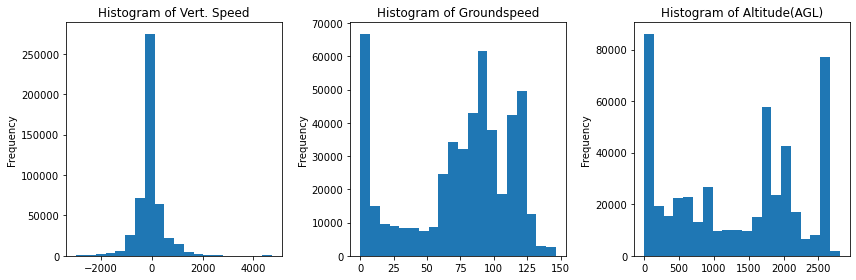

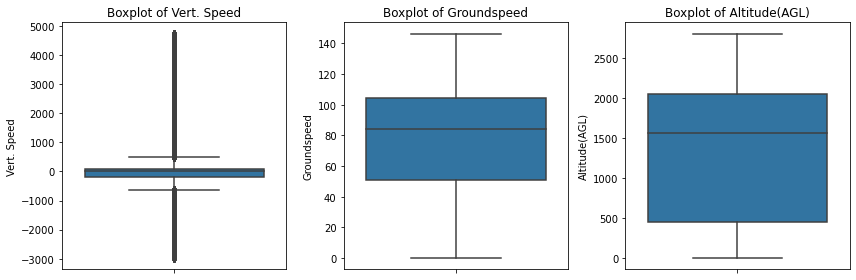

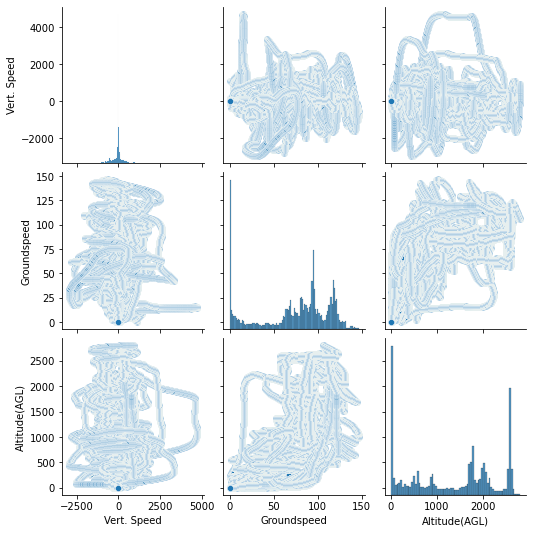

ValueError: Could not interpret input 'Day of Week'

<Figure size 576x288 with 0 Axes>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
summary_stats = selected_df2.describe()

# Data Visualization
# Numerical Features
numerical_features = ['Vert. Speed', 'Groundspeed', 'Altitude(AGL)']

# Histograms for numerical features
plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    selected_df2[feature].plot(kind='hist', bins=20, title=f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=selected_df2, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Scatter plots for relationships between numerical features
sns.pairplot(selected_df2[numerical_features])
plt.show()

# Bar chart for categorical feature 'Day of Week'
plt.figure(figsize=(8, 4))
sns.countplot(data=selected_df2, x='Day of Week')
plt.title('Count of Days of the Week')
plt.xticks(rotation=45)
plt.show()

# Line plot for feature 'Hour of Day'
plt.figure(figsize=(8, 4))
sns.lineplot(data=selected_df2, x='Hour of Day', y='Groundspeed')
plt.title('Groundspeed vs. Hour of Day')
plt.show()

# Correlation Analysis
correlation_matrix = selected_df2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


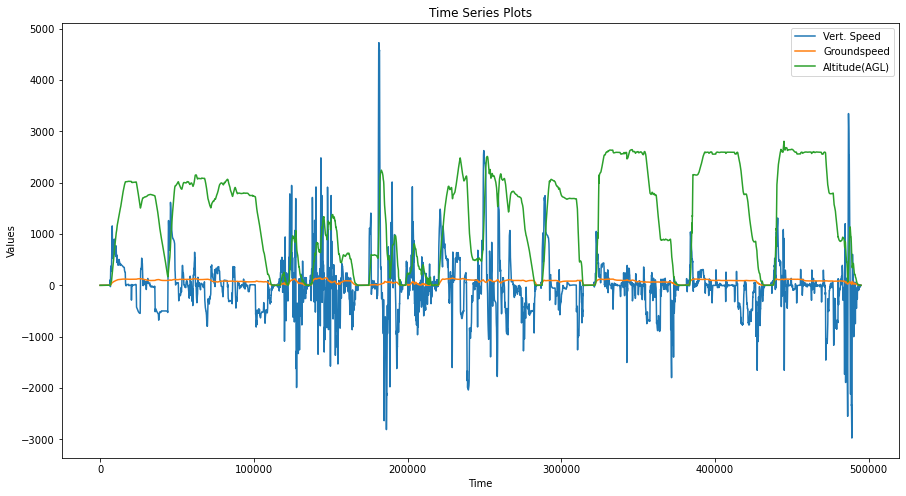

In [49]:
# Creating time series plots
plt.figure(figsize=(15, 8))
plt.plot(selected_df2.index, selected_df2['Vert. Speed'], label='Vert. Speed')
plt.plot(selected_df2.index, selected_df2['Groundspeed'], label='Groundspeed')
plt.plot(selected_df2.index, selected_df2['Altitude(AGL)'], label='Altitude(AGL)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Time Series Plots')
plt.show()

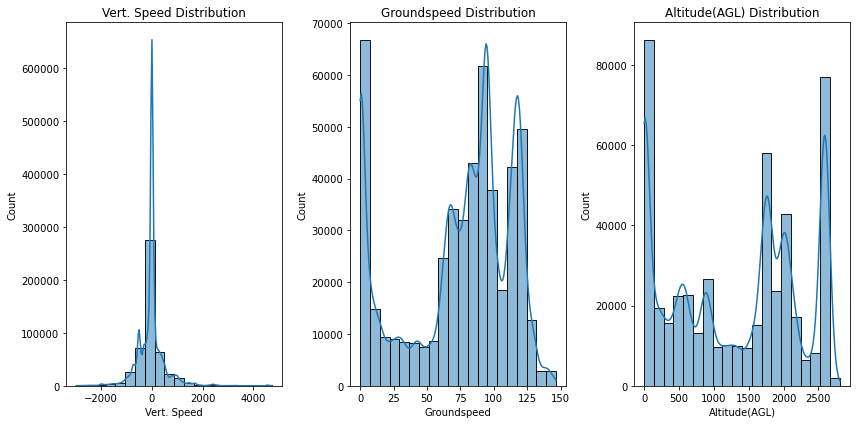

In [50]:
# Creating histograms
plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.histplot(data=selected_df2, x='Vert. Speed', bins=20, kde=True)
plt.title('Vert. Speed Distribution')

plt.subplot(132)
sns.histplot(data=selected_df2, x='Groundspeed', bins=20, kde=True)
plt.title('Groundspeed Distribution')

plt.subplot(133)
sns.histplot(data=selected_df2, x='Altitude(AGL)', bins=20, kde=True)
plt.title('Altitude(AGL) Distribution')

plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

# Create a function to classify maneuvers
def classify_maneuver(row):
    if (row['Groundspeed'] < 18) and (row['Groundspeed'] > 0.6)  and (row['Altitude(AGL)'] >= 25) and (row['Altitude(AGL)'] <= 100):
        return 'Air Taxi'
    elif (row['Vert. Speed'] > 90) and (row['Altitude(AGL)']>=100):
        return 'Climb/Ascent'
    elif (row['Vert. Speed'] < -90) and (row['Altitude(AGL)']>=100):
        return 'Descent'
    elif (row['Groundspeed'] <=18) and (row['Groundspeed'] > 0.6) and (row['Altitude(AGL)']>=2) and (row['Altitude(AGL)']<=25):
        return 'Hover Taxi'
    else:
        return 'Unknown'

# Apply the function to classify maneuvers for each row
selected_df2['Maneuver'] = selected_df2.apply(classify_maneuver, axis=1)

# Print the DataFrame with maneuver classification
print(selected_df2[['Groundspeed', 'Vert. Speed', 'Altitude(AGL)', 'Date','System UTC Time', 'Maneuver']])

        Groundspeed  Vert. Speed  Altitude(AGL)       Date  \
2             0.041       -0.001           0.06 2022-07-28   
3             0.038        0.004           0.06 2022-07-28   
4             0.032        0.008           0.06 2022-07-28   
5             0.019        0.011           0.06 2022-07-28   
6             0.010        0.013           0.06 2022-07-28   
...             ...          ...            ...        ...   
495016        0.000        0.010           0.14 2022-07-28   
495017        0.000        0.010           0.14 2022-07-28   
495018        0.000        0.010           0.14 2022-07-28   
495019        0.000        0.010           0.14 2022-07-28   
495020        0.000        0.011           0.14 2022-07-28   

               System UTC Time Maneuver  
2      1900-01-01 14:07:52.445  Unknown  
3      1900-01-01 14:07:52.467  Unknown  
4      1900-01-01 14:07:52.485  Unknown  
5      1900-01-01 14:07:52.523  Unknown  
6      1900-01-01 14:07:52.546  Unknown  
...

In [21]:
import pandas as pd

# Create a function to classify maneuvers
def classify_maneuver(row):
    if (row['Groundspeed'] < 18) and (row['Groundspeed'] > 0.6)  and (row['Altitude(AGL)'] >= 25) and (row['Altitude(AGL)'] <= 100):
        return 'Air Taxi'
    elif (row['Vert. Speed'] > 90) and (row['Altitude(AGL)']>=100):
        return 'Climb/Ascent'
    elif (row['Vert. Speed'] < -90) and (row['Altitude(AGL)']>=100):
        return 'Descent'
    elif (row['Groundspeed'] <=18) and (row['Groundspeed'] > 0.6) and (row['Altitude(AGL)']>=2) and (row['Altitude(AGL)']<=25):
        return 'Hover Taxi'
    else:
        return 'Unknown'

# Apply the function to classify maneuvers for each row
selected_df2['Maneuver'] = selected_df2.apply(classify_maneuver, axis=1)

# Creating a DataFrame to count the occurrences of each maneuver
maneuver_counts = selected_df2['Maneuver'].value_counts().reset_index()
maneuver_counts.columns = ['Maneuver', 'Count']

# Print the DataFrame with maneuver classification
print(selected_df2[['Groundspeed', 'Vert. Speed', 'Altitude(AGL)', 'Date','System UTC Time', 'Maneuver']])


        Groundspeed  Vert. Speed  Altitude(AGL)       Date  \
2             0.041       -0.001           0.06 2022-07-28   
3             0.038        0.004           0.06 2022-07-28   
4             0.032        0.008           0.06 2022-07-28   
5             0.019        0.011           0.06 2022-07-28   
6             0.010        0.013           0.06 2022-07-28   
...             ...          ...            ...        ...   
495016        0.000        0.010           0.14 2022-07-28   
495017        0.000        0.010           0.14 2022-07-28   
495018        0.000        0.010           0.14 2022-07-28   
495019        0.000        0.010           0.14 2022-07-28   
495020        0.000        0.011           0.14 2022-07-28   

               System UTC Time Maneuver  
2      1900-01-01 14:07:52.445  Unknown  
3      1900-01-01 14:07:52.467  Unknown  
4      1900-01-01 14:07:52.485  Unknown  
5      1900-01-01 14:07:52.523  Unknown  
6      1900-01-01 14:07:52.546  Unknown  
...

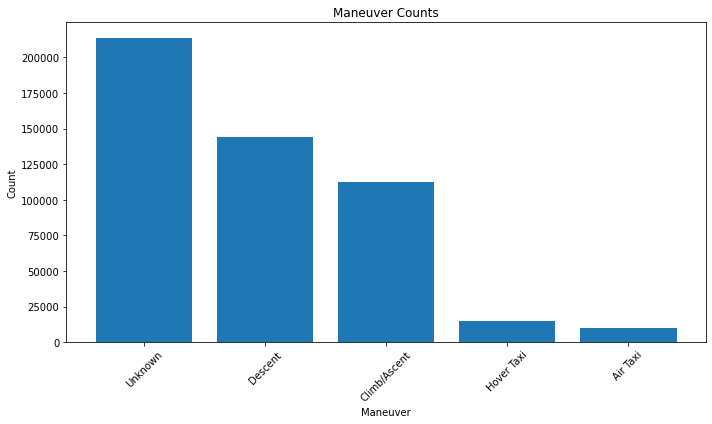

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(maneuver_counts['Maneuver'], maneuver_counts['Count'])
plt.xlabel('Maneuver')
plt.ylabel('Count')
plt.title('Maneuver Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display bar graph
plt.tight_layout()
plt.show()


In [22]:
# Initialize counts
air_taxi_count = 0
hover_taxi_count = 0
climb_count = 0
descent_count = 0

# Iterate through the 'maneuver_counts' DataFrame and count instances
for index, row in maneuver_counts.iterrows():
    maneuver = row['Maneuver']
    count = row['Count']
    if 'Air Taxi' in maneuver:
        air_taxi_count += count
    elif 'Hover Taxi' in maneuver:
        hover_taxi_count += count
    elif 'Climb' in maneuver:
        climb_count += count
    elif 'Descent' in maneuver:
        descent_count += count

# Calculate total rows
total_rows = sum([air_taxi_count, hover_taxi_count, climb_count, descent_count])

# Print counts and total rows
print(f'Air Taxi Count: {air_taxi_count}')
print(f'Hover Taxi Count: {hover_taxi_count}')
print(f'Climb Count: {climb_count}')
print(f'Descent Count: {descent_count}')
print(f'Total Rows: {total_rows}')

Air Taxi Count: 9711
Hover Taxi Count: 15070
Climb Count: 112188
Descent Count: 144160
Total Rows: 281129


##### Physics Model 2

In [23]:
def is_close_to_zero(value, tolerance=1e-6):
    return abs(value) < tolerance

# Create a function to identify phases
def identify_phase(Vert_Speed, Groundspeed, Altitude_AGL):
    if is_close_to_zero(Vert_Speed) and Groundspeed < 0.6 and 0 <= Altitude_AGL < 2:
        return "Standing"
    elif is_close_to_zero(Vert_Speed) and 0.6 <= Groundspeed < 20 and 0 <= Altitude_AGL < 2:
        return "Surface Taxi"
    elif is_close_to_zero(Vert_Speed) and 0.6 <= Groundspeed < 30 and 2 <= Altitude_AGL < 25:
        return "Hover Taxi"
    elif is_close_to_zero(Vert_Speed) and 0.6 <= Groundspeed < 50 and 25 <= Altitude_AGL < 100:
        return "Air Taxi"
    elif -90 <= Vert_Speed <= 90 and Groundspeed <= 0.6 and Altitude_AGL < 2:
        return "Hover In Ground Effect"
    elif -90 <= Vert_Speed <= 90 and Groundspeed <= 0.6 and Altitude_AGL >= 100:
        return "Hover"
    elif Vert_Speed > 90 and Groundspeed <= 0.6 and Altitude_AGL < 100:
        return "Hover Lift"
    elif Vert_Speed < -90 and Groundspeed <= 0.6 and Altitude_AGL < 100:
        return "Hover Descent"
    elif Vert_Speed > 90 and Altitude_AGL >= 100:
        return "Climb"
    elif -90 <= Vert_Speed <= 90 and Groundspeed > 0.6 and Altitude_AGL >= 100:
        return "Cruise"
    elif Vert_Speed < -90 and Altitude_AGL >= 100:
        return "Descent"
    else:
        return "LandingOrTakeOff"

# Apply the function to identify phases for each row
selected_df2['Phase'] = selected_df2.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)

# Print the DataFrame with phase identification
print(selected_df2[['Vert. Speed', 'Groundspeed', 'Altitude(AGL)', 'Date', 'System UTC Time', 'Phase']])


        Vert. Speed  Groundspeed  Altitude(AGL)       Date  \
2            -0.001        0.041           0.06 2022-07-28   
3             0.004        0.038           0.06 2022-07-28   
4             0.008        0.032           0.06 2022-07-28   
5             0.011        0.019           0.06 2022-07-28   
6             0.013        0.010           0.06 2022-07-28   
...             ...          ...            ...        ...   
495016        0.010        0.000           0.14 2022-07-28   
495017        0.010        0.000           0.14 2022-07-28   
495018        0.010        0.000           0.14 2022-07-28   
495019        0.010        0.000           0.14 2022-07-28   
495020        0.011        0.000           0.14 2022-07-28   

               System UTC Time                   Phase  
2      1900-01-01 14:07:52.445  Hover In Ground Effect  
3      1900-01-01 14:07:52.467  Hover In Ground Effect  
4      1900-01-01 14:07:52.485  Hover In Ground Effect  
5      1900-01-01 14:07:52.

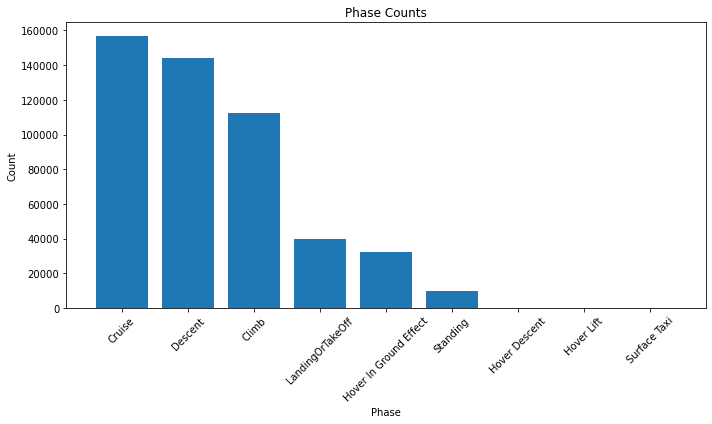

In [55]:
import matplotlib.pyplot as plt

# Create a DataFrame to count the occurrences of each maneuver
maneuver_counts = selected_df2['Phase'].value_counts().reset_index()
maneuver_counts.columns = ['Phase', 'Count']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(maneuver_counts['Phase'], maneuver_counts['Count'])
plt.xlabel('Phase')
plt.ylabel('Count')
plt.title('Phase Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the bar graph
plt.tight_layout()
plt.show()

In [24]:
# Count each type of phase
phase_counts = selected_df2['Phase'].value_counts()

# Print the counts
print(phase_counts)

Cruise                    156766
Descent                   144160
Climb                     112188
LandingOrTakeOff           39716
Hover In Ground Effect     32096
Standing                    9986
Hover Descent                 56
Hover Lift                    20
Surface Taxi                   1
Name: Phase, dtype: int64


### Balancing the dataset

In [41]:
'''
from imblearn.over_sampling import SMOTE
import pandas as pd

# X should contain features (independent variables), and y should contain target variable (Phase)

# Separate the features and target variable
X = selected_df2[['Vert. Speed', 'Groundspeed', 'Altitude(AGL)']]
y = selected_df2['Phase']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy as needed

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Phase')], axis=1)

# Print the count of each class after SMOTE
print(resampled_df['Phase'].value_counts())
'''

"\nfrom imblearn.over_sampling import SMOTE\nimport pandas as pd\n\n# X should contain features (independent variables), and y should contain target variable (Phase)\n\n# Separate the features and target variable\nX = selected_df2[['Vert. Speed', 'Groundspeed', 'Altitude(AGL)']]\ny = selected_df2['Phase']\n\n# Initialize SMOTE\nsmote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy as needed\n\n# Apply SMOTE to generate synthetic samples\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\n# Create a new DataFrame with the resampled data\nresampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Phase')], axis=1)\n\n# Print the count of each class after SMOTE\nprint(resampled_df['Phase'].value_counts())\n"

In [25]:
#SVM
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_to_scale = ['Vert. Speed', 'Groundspeed', 'Altitude(AGL)']
selected_df2[features_to_scale] = scaler.fit_transform(selected_df2[features_to_scale])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = selected_df2[['Vert. Speed', 'Groundspeed', 'Altitude(AGL)']]
y = selected_df2['Phase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_rep)
    print("=" * 40)

Classifier: Random Forest
Accuracy: 1.00
Classification Report:
                        precision    recall  f1-score   support

                 Climb       1.00      1.00      1.00     22475
                Cruise       1.00      1.00      1.00     31481
               Descent       1.00      1.00      1.00     28594
         Hover Descent       1.00      1.00      1.00         8
Hover In Ground Effect       1.00      1.00      1.00      6488
            Hover Lift       1.00      1.00      1.00         4
      LandingOrTakeOff       1.00      1.00      1.00      7919
              Standing       1.00      1.00      1.00      2029

              accuracy                           1.00     98998
             macro avg       1.00      1.00      1.00     98998
          weighted avg       1.00      1.00      1.00     98998



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Logistic Regression
Accuracy: 0.90
Classification Report:
                        precision    recall  f1-score   support

                 Climb       0.98      0.88      0.93     22475
                Cruise       0.86      0.99      0.92     31481
               Descent       0.99      0.91      0.95     28594
         Hover Descent       0.00      0.00      0.00         8
Hover In Ground Effect       0.66      1.00      0.80      6488
            Hover Lift       0.00      0.00      0.00         4
      LandingOrTakeOff       0.88      0.76      0.82      7919
              Standing       0.00      0.00      0.00      2029

              accuracy                           0.90     98998
             macro avg       0.55      0.57      0.55     98998
          weighted avg       0.90      0.90      0.89     98998



In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = selected_df2[['Vert. Speed', 'Groundspeed', 'Altitude(AGL)']]
y = selected_df2['Phase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test);

print ("")
print ("Classification Report: ")
print (classification_report(y_test, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(y_test, pred_y))


Classification Report: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

                 Climb       1.00      0.92      0.96     22475
                Cruise       0.92      1.00      0.96     31481
               Descent       1.00      0.97      0.98     28594
         Hover Descent       0.00      0.00      0.00         8
Hover In Ground Effect       0.68      1.00      0.81      6488
            Hover Lift       0.00      0.00      0.00         4
      LandingOrTakeOff       0.97      0.86      0.91      7919
              Standing       0.00      0.00      0.00      2029

              accuracy                           0.94     98998
             macro avg       0.57      0.59      0.58     98998
          weighted avg       0.93      0.94      0.93     98998


Accuracy Score:  0.9394432210751732


In [29]:
print('Done with SVM Model')

Done with SVM Model
